# Exercício 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report 
from sklearn.datasets import make_blobs
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [2]:
# generate 2 class dataset
x, y = make_classification(n_samples=10000, n_classes=2, weights=[0.9,0.5],
random_state=42)

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

In [3]:
# Instantiate LogisticRegression object for multi-class case.
model = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='multinomial')

# Train model.
model.fit(x_train, y_train)

# Predict.
y_pred_log = model.predict(x_test)

# Getting the probabilities for each class.
y_prob_log = model.predict_proba(x_test)

# Binarize the test targets.
y_test_bin_log = label_binarize(y_test, classes=[0, 1, 2])

In [4]:
# Instantiate a Gaussian naive Bayes classifier.
gnb = GaussianNB()

# Train model.
gnb.fit(x_train, y_train)

# Predict.
y_pred_gnb = gnb.predict(x_test)

# Getting the probabilities for each class.
y_prob_gnb = gnb.predict_proba(x_test)

# Binarize the test targets.
y_test_bin_gnb = label_binarize(y_test, classes=[0, 1, 2])

In [5]:
parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20]}]
svc = KNeighborsClassifier()

clf = GridSearchCV(svc, parameters, cv=10, verbose=3, n_jobs=-1)
clf.fit(x, y)

# print(clf.best_params_)
# print(clf.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   58.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [6]:
svc = KNeighborsClassifier(n_neighbors=15, weights='uniform')
svc.fit(x_train, y_train)

# Predict.
y_pred_svc = svc.predict(x_test)

# Getting the probabilities for each class.
y_prob_svc = svc.predict_proba(x_test)

y_test_bin_svc = label_binarize(y_test, classes=[0, 1, 2])

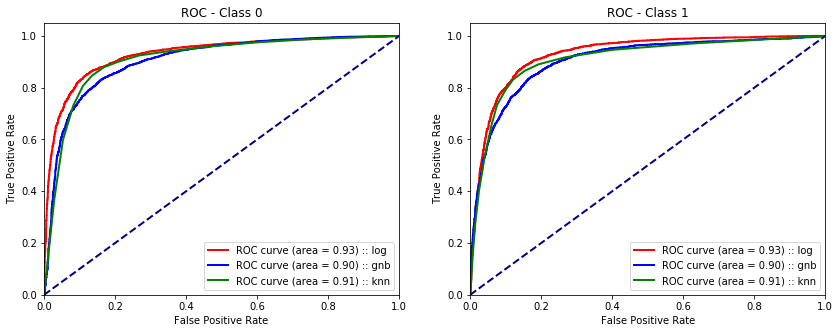

In [7]:
# Compute ROC curve and ROC area for each class.
fpr_gnb = dict()
tpr_gnb = dict()
fpr_log = dict()
tpr_log = dict()
fpr_svc = dict()
tpr_svc = dict()
roc_auc_gnb = dict()
roc_auc_log = dict()
roc_auc_svc = dict()
plt.figure(figsize=(14, 5))

lw = 2
for i in range(2):
    # Calculating ROC curve and ROC AUC.
    fpr_gnb[i], tpr_gnb[i], _ = roc_curve(y_test_bin_gnb[:, i], y_prob_gnb[:, i])
    roc_auc_gnb[i] = auc(fpr_gnb[i], tpr_gnb[i])
    
    fpr_log[i], tpr_log[i], _ = roc_curve(y_test_bin_log[:, i], y_prob_log[:, i])
    roc_auc_log[i] = auc(fpr_log[i], tpr_log[i])
    
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test_bin_svc[:, i], y_prob_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])
    
    # Plotting ROC curve for class i.
    ax = plt.subplot(1, 2, i + 1)
    plt.plot(fpr_log[i], tpr_log[i], color='red', lw=lw, label='ROC curve (area = %0.2f) :: log' % roc_auc_log[i])
    plt.plot(fpr_gnb[i], tpr_gnb[i], color='blue', lw=lw, label='ROC curve (area = %0.2f) :: gnb' % roc_auc_gnb[i])
    plt.plot(fpr_svc[i], tpr_svc[i], color='green', lw=lw, label='ROC curve (area = %0.2f) :: knn' % roc_auc_svc[i])
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Class '+str(i))
    plt.legend(loc="lower right")

plt.show()

## Resposta:

Com base nas curvas ROC e nas áreas AUC, pode-se afirmar que o classificador de regressão logística apresentou melhor desempenho. 